In [126]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import meanderpy as mp ## https://github.com/zsylvester/meanderpy
from importlib import reload
reload(mp)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
from PIL import Image, ImageChops, ImageStat

In [127]:
m1 = np.random.normal(60.0/(365*24*60*60.0), 1/(365*24*60*60.0), 50)    #migration
m2 = np.random.uniform(0, 1, 50)   #chezy
m3 = np.random.uniform(2, 5, 50)   #cutoff

v1 = np.array(m1)
v2 = np.array(m2)
v3 = np.array(m3)

for i in range(10):
    nit = 2                   # number of iterations
    W = 200.0                    # channel width (m)
    D = 6.0                      # channel depth (m)
    depths = D * np.ones((nit,))  # channel depths for different iterations  
    pad = 500                    # padding (number of nodepoints along centerline)
    deltas = 100.0                # sampling distance along centerline           
    Cfs = v2[i] * np.ones((nit,)) # dimensionless Chezy friction factor
    crdist = v3[i] * W               # threshold distance at which cutoffs occur
    kl = v1[i]                  # migration rate constant (m/s)
    kv =  1.0e-12               # vertical slope-dependent erosion rate constant (m/s)
    dt = 315360000              # time step (s)
    dens = 1000                  # density of water (kg/m3)
    saved_ts = 1                 # which time steps will be saved
    n_bends = 20                 # approximate number of bends you want to model
    Sl = 0.0                     # initial slope (matters more for submarine channels than rivers)
    t1 = 500                    # time step when incision starts
    t2 = 700                    # time step when lateral migration starts
    t3 = 1200                    # time step when aggradation starts
    aggr_factor = 2e-9         # aggradation factor (m/s, about 0.18 m/year, it kicks in after t3)
   
    os.chdir(r"C:\Users\Family PC\OneDrive - California Institute of Technology\river\Ucayali Centerlines")
    cl1=np.loadtxt('CL16.txt',delimiter=',')
    cl2=np.loadtxt('CL32.txt',delimiter=',')
    H=depths[0]
    y=cl1[:,0][::-1]*10
    x=cl1[:,1][::-1]*10
    z=np.zeros(len(x))


    ch=mp.Channel(x,y,z,W,H)
    chb=mp.ChannelBelt(channels=[ch], cutoffs=[], cl_times=[0.0], cutoff_times=[])
    ch = mp.generate_initial_channel(W,D,Sl,deltas,pad,n_bends) # initialize channel
    chb.migrate(nit,saved_ts,deltas,pad,crdist,depths,Cfs,kl,kv,dt,dens,t1,t2,t3,aggr_factor) # channel migration
    channel_coordinate = pd.DataFrame({"x":chb.channels[1].x, "y":chb.channels[1].y, "Z":chb.channels[1].z}) # the way it work is this: chb.channels[i].x will give you the x coordinates for the ith time step
    np.savetxt('output%s.txt'% i, channel_coordinate, delimiter=',')
    print('You are running this simulation for:', dt/(365.*24*60*60),'Years')
    print('Migration rate constant =', kl*60.*24.*365., 'm/yr')



  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 0.9791393702565199 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 0.9887238879642859 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 0.9959546171075738 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 1.0249611928590594 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 0.9892398690657831 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 0.9864338077599559 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 0.9906715849426176 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 1.0066940812757565 m/yr


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 1.0276492304132223 m/yr


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.20it/s]

You are running this simulation for: 10.0 Years
Migration rate constant = 1.000715680817835 m/yr


In [128]:
for i in range(0,10):
    globals()['output%s'% i] = pd.read_csv('{}{}{}'.format('output',i,'.txt'), sep=",", header=None)

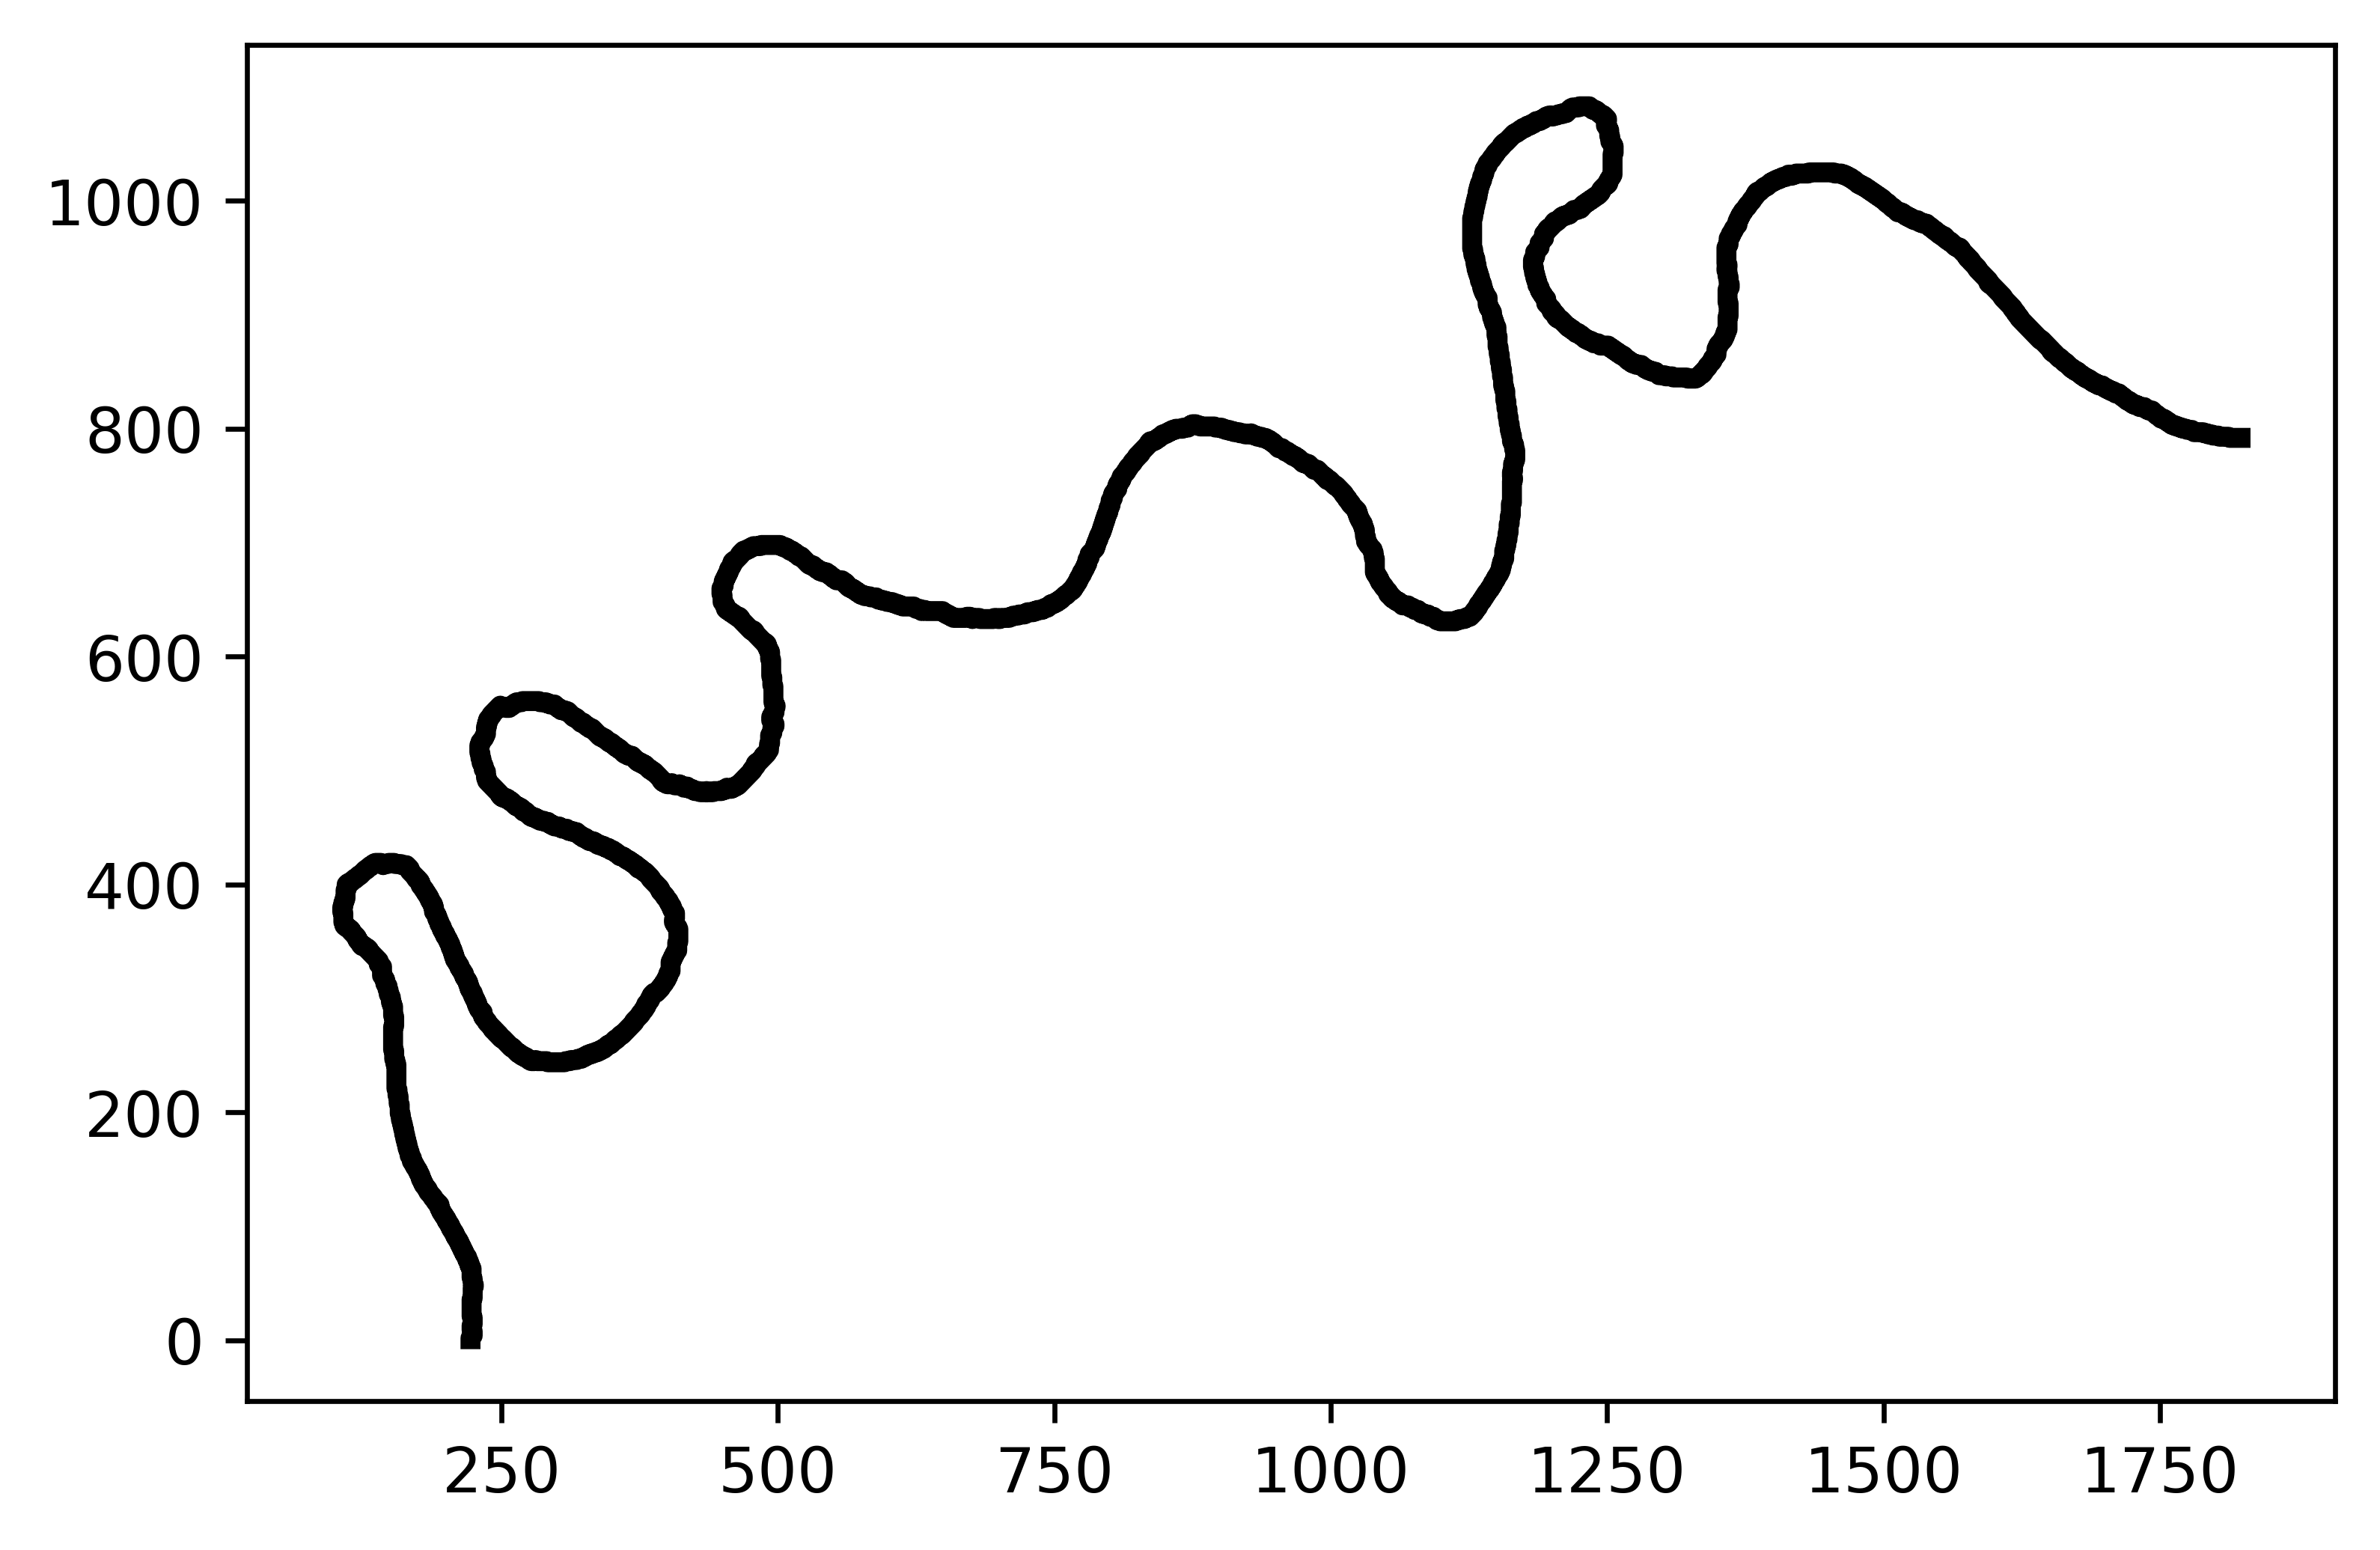

<Figure size 3600x2400 with 0 Axes>

In [125]:
from matplotlib.pyplot import cm
cl1=np.loadtxt('CL1.txt',delimiter=',')
cl2=np.loadtxt('CL26.txt',delimiter=',')

n = 50
size = 70
alpha = 0.4
ax.set_xlim([0, 1800])
ax.set_ylim([0, 1000])
plt.plot(cl2[:,1],cl2[:,0], color = 'black', linewidth=3.2)
plt.show()

plt.savefig("basefile.png", transparent=True)

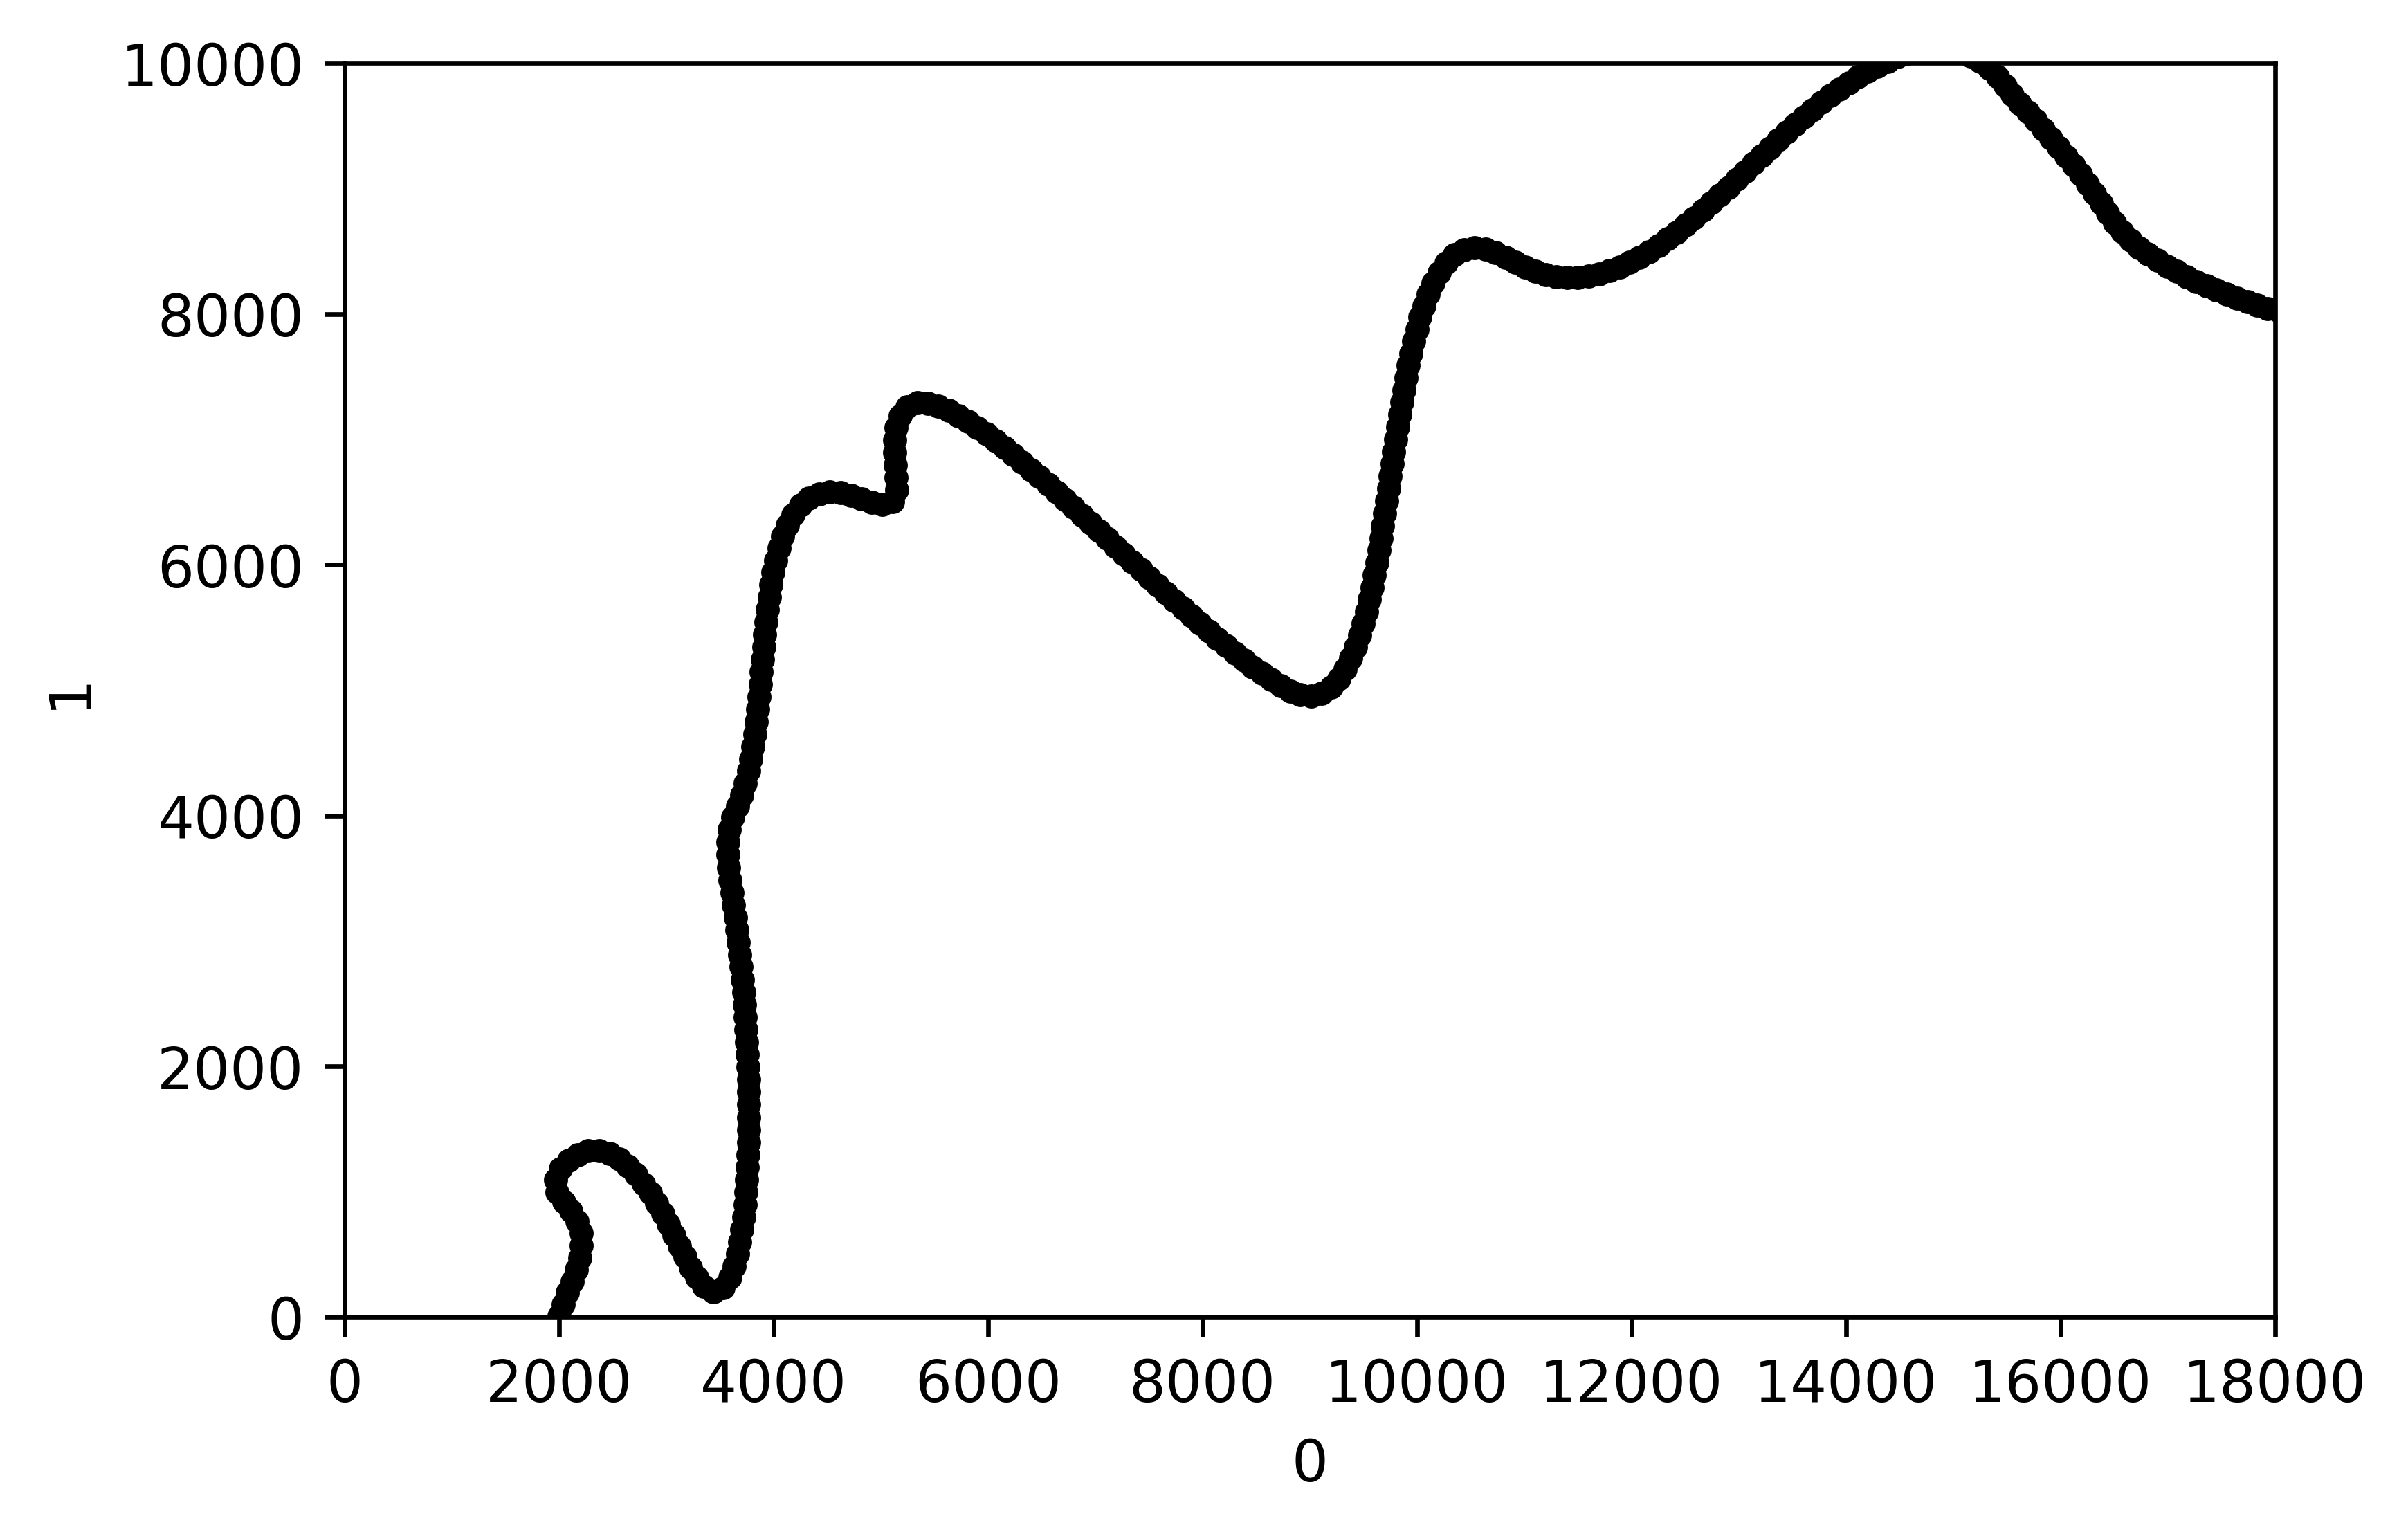

In [131]:
from matplotlib.pyplot import cm
df=pd.DataFrame({'x_values': range(1,101), 'y_values': np.random.randn(100)*80+range(1,101) })
all_poss=['.','o','v','^','>','<','s','p','*','h','H','D','d','1','','']
n = 50
size = 70
alpha =1    

for i in range(1):
    ax = output2.plot(x =0, y=1, kind='scatter', lw=0, color = 'black', alpha=alpha, s=size,marker='.')
    ax.set_xlim([0, 18000])
    ax.set_ylim([0, 10000])
    plt.savefig('output2.png', transparent=True)

In [123]:
for i in range(10):
    img1 = Image.open('basefile.png')
    img2 = Image.open('{}{}{}'.format("output",i,".png"))

    diff = ImageChops.difference(img1, img2)

    stat = ImageStat.Stat(diff)
    diff_ratio = sum(stat.mean) / (len(stat.mean) * 255)
    print (diff_ratio)

0.03554298951525054
0.03187969816630356
0.03267894346859114
0.035825655410312275
0.03332041632625273
0.03478362801833696
0.03280385620915033
0.033538714483478574
0.035096093636528686
0.03216911855482934
